In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
x_load =np.load(r'C:\Users\Pc\Desktop\pythonudemy1\DATAI\sign-language-digits-dataset\X.npy')
y_load =np.load(r'C:\Users\Pc\Desktop\pythonudemy1\DATAI\sign-language-digits-dataset\Y.npy')

(-0.5, 63.5, 63.5, -0.5)

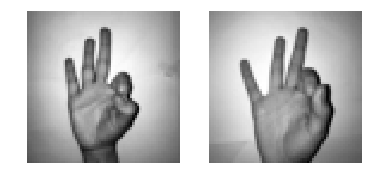

In [4]:
img_size=64
plt.subplot(1,2,1)
plt.imshow(x_load[200].reshape(img_size,img_size),cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_load[100].reshape(img_size,img_size),cmap='gray')
plt.axis('off')

### Train-Test Split
Lets split X and Y into train and test sets.

In [3]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(x_load,y_load, test_size=test_size, random_state=20)

img_size = 64
channel_size = 1
print("Training Size:", X_train.shape)
print(X_train.shape[0],"samples - ", X_train.shape[1],"x",X_train.shape[2],"grayscale image")

print("\n")

print("Test Size:",X_test.shape)
print(X_test.shape[0],"samples - ", X_test.shape[1],"x",X_test.shape[2],"grayscale image")

#X_train =X_train/255
#X_test=X_test/255
X_test = X_test[:,:,:,np.newaxis]
X_train=X_train[:,:,:,np.newaxis]

Training Size: (1649, 64, 64)
1649 samples -  64 x 64 grayscale image


Test Size: (413, 64, 64)
413 samples -  64 x 64 grayscale image


In [4]:
import keras
from keras import layers,models
from keras.layers import BatchNormalization

from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense,Dropout
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD, RMSprop, Adam

Using TensorFlow backend.


In [5]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(68, (5, 5), input_shape = (64, 64, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(68, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(68, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#LOSS

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Generate Images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.08,
                                   zoom_range = 0.08,
                                   horizontal_flip = False,
                                   width_shift_range= 0.02,
                                   height_shift_range= 0.02)
test_datagen = ImageDataGenerator(rescale = 1./255)

# fit parameters from data
training_set = train_datagen.flow(X_train, Y_train, batch_size=64)
test_set = test_datagen.flow(X_test, Y_test, batch_size=64)

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 500)

Epoch 1/3
50/50 [==============================] - 228s 5s/step - loss: 0.2640 - acc: 0.9107 - val_loss: 0.9936 - val_acc: 0.8537
Epoch 2/3
50/50 [==============================] - 228s 5s/step - loss: 0.1129 - acc: 0.9598 - val_loss: 1.4597 - val_acc: 0.8547
Epoch 3/3
50/50 [==============================] - 234s 5s/step - loss: 0.0827 - acc: 0.9716 - val_loss: 1.2834 - val_acc: 0.8440


In [8]:
scores = classifier.evaluate(X_test, Y_test, verbose=0)
print("{}: {:.2f}%".format(classifier.metrics_names[1], scores[1]*100))

acc: 84.60%


In [ ]:
plt.plot(history.history['acc'], color='b', label="accuracy")
plt.title("accuracy rate")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

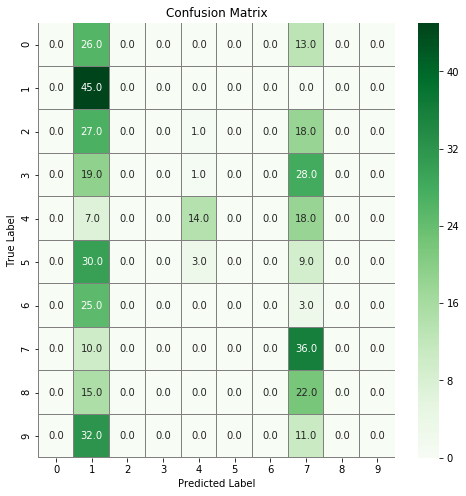

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = classifier.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
X_flat = np.array(x_load).reshape((2062, 64*64))


In [71]:
X_flat.shape

(2062, 4096)

In [72]:
from sklearn.decomposition import PCA
pca_dims = PCA()
pca_dims.fit(X_flat)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

316

In [73]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_flat)
X_recovered = pca.inverse_transform(X_reduced)

In [74]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (2062, 316)
recovered shape: (2062, 4096)


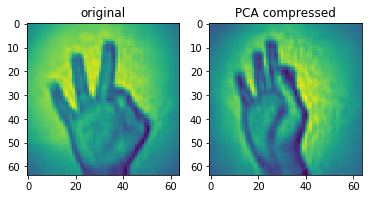

In [75]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

In [76]:
Y=y_load
Y.shape

(2062, 10)

In [77]:
X = X_recovered.reshape(-1, 64, 64, 1)
X.shape

(2062, 64, 64, 1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

In [79]:
print("train",X_train.shape)
print("test",y_train.shape)

train (1649, 64, 64, 1)
test (1649, 10)


In [43]:
X_train = X_train /255
X_test = X_test/255

In [44]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Convolution2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


In [45]:
model = Sequential()
model.add(Convolution2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(64, 64, 1)))
model.add(Convolution2D(16, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Convolution2D(32, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64, kernel_size=(2, 2), strides=(1, 1), activation='relu'))
model.add(Convolution2D(64, kernel_size=(2, 2), strides=(2, 2), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [46]:
optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [58]:
from keras import optimizers
model.compile(optimizer = optimizers.Adadelta() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [59]:
epochs =10  # for better result increase the epochs
batch_size = 32

In [60]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [61]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/10
51/51 [==============================] - 18s 348ms/step - loss: 2.3029 - acc: 0.0913 - val_loss: 2.3026 - val_acc: 0.0993
Epoch 2/10
51/51 [==============================] - 17s 335ms/step - loss: 2.3029 - acc: 0.0956 - val_loss: 2.3026 - val_acc: 0.1017
Epoch 3/10
51/51 [==============================] - 17s 324ms/step - loss: 2.3029 - acc: 0.0930 - val_loss: 2.3026 - val_acc: 0.0993
Epoch 4/10
51/51 [==============================] - 16s 321ms/step - loss: 2.3029 - acc: 0.0869 - val_loss: 2.3026 - val_acc: 0.1017
Epoch 5/10
51/51 [==============================] - 16s 322ms/step - loss: 2.3028 - acc: 0.0906 - val_loss: 2.3026 - val_acc: 0.1017
Epoch 6/10
51/51 [==============================] - 17s 333ms/step - loss: 2.3029 - acc: 0.0944 - val_loss: 2.3026 - val_acc: 0.1017
Epoch 7/10
51/51 [==============================] - 16s 322ms/step - loss: 2.3030 - acc: 0.0918 - val_loss: 2.3026 - val_acc: 0.1017
Epoch 8/10
51/51 [==============================] - 16s 322ms/step - 

In [62]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("{}: {:.2f}%".format(model.metrics_names[1], scores[1]*100))

acc: 10.17%
